In [18]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib as plt
plt.style.use('fivethirtyeight')

In [19]:
consumerkey='DoRSOXWmXC3etRbD4Rc2KOxVl'
consumersecret='BNi1LMuGYOckXlIlpP9RH3HVQNeNpfprtLyvzvpfcbDtp6TUNt'
accesstoken='1336205303889633280-yqTZxH6ZU3v4cbh9KCfzcX0Rnjv3AA'
accesstokensecret='6pb9442pMYdJAIjKcPpGBOD7pfuMXIsKDrnpMNUiYZM1T'

In [20]:
authenticate=tweepy.OAuthHandler(consumerkey,consumersecret)
authenticate.set_access_token(accesstoken,accesstokensecret)
api=tweepy.API(authenticate,wait_on_rate_limit=True)

In [21]:
posts=api.user_timeline(screen_name="realDonaldTrump",count=1000,lang="en",tweet_mode="extended")
posts1=api.user_timeline(screen_name="JoeBiden",count=1000,lang="en",tweet_mode="extended")
#for tweet in posts:
 # print(tweet.full_text + '\n')


In [22]:
df=pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df1=pd.DataFrame([tweet.full_text for tweet in posts1], columns=['Tweets'])
df1


,Tweets
0,I have worked closely with Secretary-designate...
1,Secretary-designate Lloyd Austin is feared by ...
2,RT @Transition46: Our national security team w...
3,This pandemic is one of the toughest challenge...
4,"Throughout his lifetime of dedicated service, ..."
...,...
195,"To make progress, we have to stop treating our..."
196,"Once this election is finalized and behind us,..."
197,Every vote must be counted. No one is going to...
198,"The presidency, itself, is not a partisan inst..."


In [23]:
def cleantxt(text):
   text=re.sub(r'@[A-Za-z0-9]+','',text)
   text=re.sub(r'#','',text)
   text=re.sub(r'https?:\/\/\S+','',text)
   text=re.sub(r'RT[\s]+','',text)
   return text

In [24]:
def cleantxt1(text):
   text=re.sub(r'https?:\/\/\S+','',text)
   text=re.sub(r'RT[\s]+','',text)
   return text

In [25]:
df['Tweets']=df['Tweets'].apply(cleantxt)
#df1['Tweets']=df['Tweets'].apply(cleantxt)
df1['Tweets']=df1['Tweets'].apply(cleantxt1)

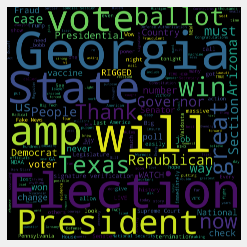

In [26]:
allwords=' '.join([twts for twts in df['Tweets']])
wordcloud=WordCloud(width=5000,height=5000,random_state=9).generate(allwords)

import matplotlib.pyplot
matplotlib.pyplot.imshow(wordcloud,interpolation='bilinear')
matplotlib.pyplot.axis('off')
matplotlib.pyplot.show()

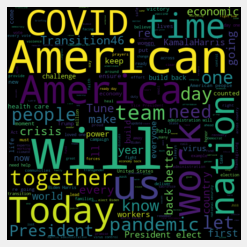

In [27]:
allwords1=' '.join([twts for twts in df1['Tweets']])
wordcloud1=WordCloud(width=500,height=500,random_state=21,max_font_size=119).generate(allwords1)

import matplotlib.pyplot
matplotlib.pyplot.imshow(wordcloud1,interpolation='bilinear')
matplotlib.pyplot.axis('off')
matplotlib.pyplot.show()

In [28]:
def getsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getpolarity(text):
  return TextBlob(text).sentiment.polarity

df['subjectivity']=df['Tweets'].apply(getsubjectivity)
df['polarity']=df['Tweets'].apply(getpolarity)

df1['subjectivity']=df1['Tweets'].apply(getsubjectivity)
df1['polarity']=df1['Tweets'].apply(getpolarity)
df1

,Tweets,subjectivity,polarity
0,I have worked closely with Secretary-designate...,0.0,0.000000
1,Secretary-designate Lloyd Austin is feared by ...,1.0,0.700000
2,@Transition46: Our national security team will...,0.5,0.500000
3,This pandemic is one of the toughest challenge...,0.0,0.000000
4,"Throughout his lifetime of dedicated service, ...",0.5,0.050000
...,...,...,...
195,"To make progress, we have to stop treating our...",0.0,0.000000
196,"Once this election is finalized and behind us,...",0.7,-0.333333
197,Every vote must be counted. No one is going to...,0.0,0.000000
198,"The presidency, itself, is not a partisan inst...",0.8,0.400000


In [29]:
def getanalysis(score):
   if score<0.05 :
     return 'Negative'
   else:
      return 'Positive'
df['Analysis']=df['polarity'].apply(getanalysis)
df1['Analysis']=df1['polarity'].apply(getanalysis)

In [30]:
df1['Analysis'].value_counts()

Positive    111
Negative     89
Name: Analysis, dtype: int64

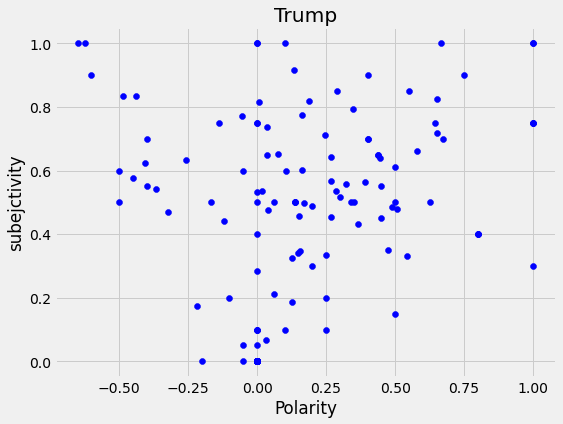

In [31]:
import matplotlib.pyplot
matplotlib.pyplot.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
   matplotlib.pyplot.scatter(df['polarity'][i],df['subjectivity'][i],color='Blue')
matplotlib.pyplot.title('Trump')
matplotlib.pyplot.xlabel('Polarity')
matplotlib.pyplot.ylabel('subejctivity')
matplotlib.pyplot.show()

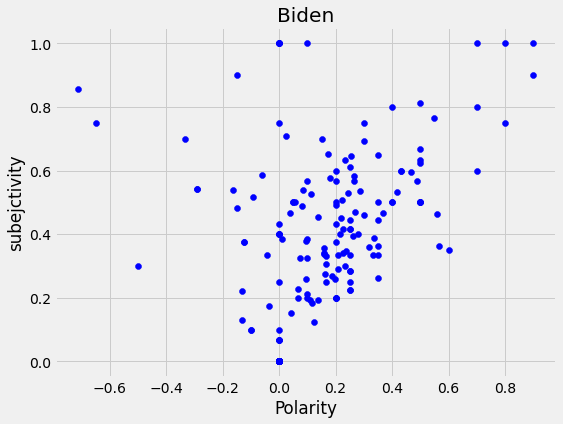

In [32]:
import matplotlib.pyplot
matplotlib.pyplot.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
   matplotlib.pyplot.scatter(df1['polarity'][i],df1['subjectivity'][i],color='Blue')
matplotlib.pyplot.title('Biden')
matplotlib.pyplot.xlabel('Polarity')
matplotlib.pyplot.ylabel('subejctivity')
matplotlib.pyplot.show()

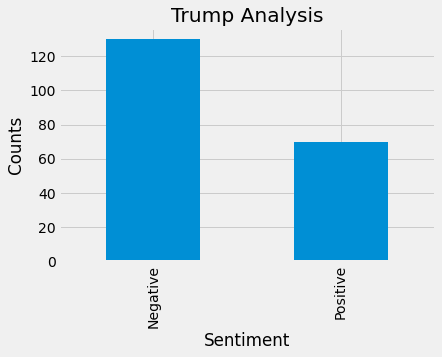

In [33]:
import matplotlib.pyplot

matplotlib.pyplot.title('Trump Analysis')
matplotlib.pyplot.xlabel('Sentiment')
matplotlib.pyplot.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
matplotlib.pyplot.show()

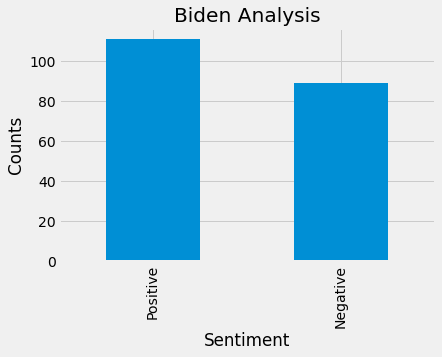

In [34]:
import matplotlib.pyplot

matplotlib.pyplot.title('Biden Analysis')
matplotlib.pyplot.xlabel('Sentiment')
matplotlib.pyplot.ylabel('Counts')
df1['Analysis'].value_counts().plot(kind='bar')
matplotlib.pyplot.show()